In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 57.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00


In [3]:
!nvidia-smi

Sat Dec  6 18:55:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
from roboflow import Roboflow

rf = Roboflow(api_key="XXXXXXXXXXXXX")
project = rf.workspace("computer-vision-obj1q").project("apples-ngxie")
version = project.version(6)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Apples-6 in yolov8:: 100%|██████████| 532/532 [00:00<00:00, 10459.07it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Apples-6/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

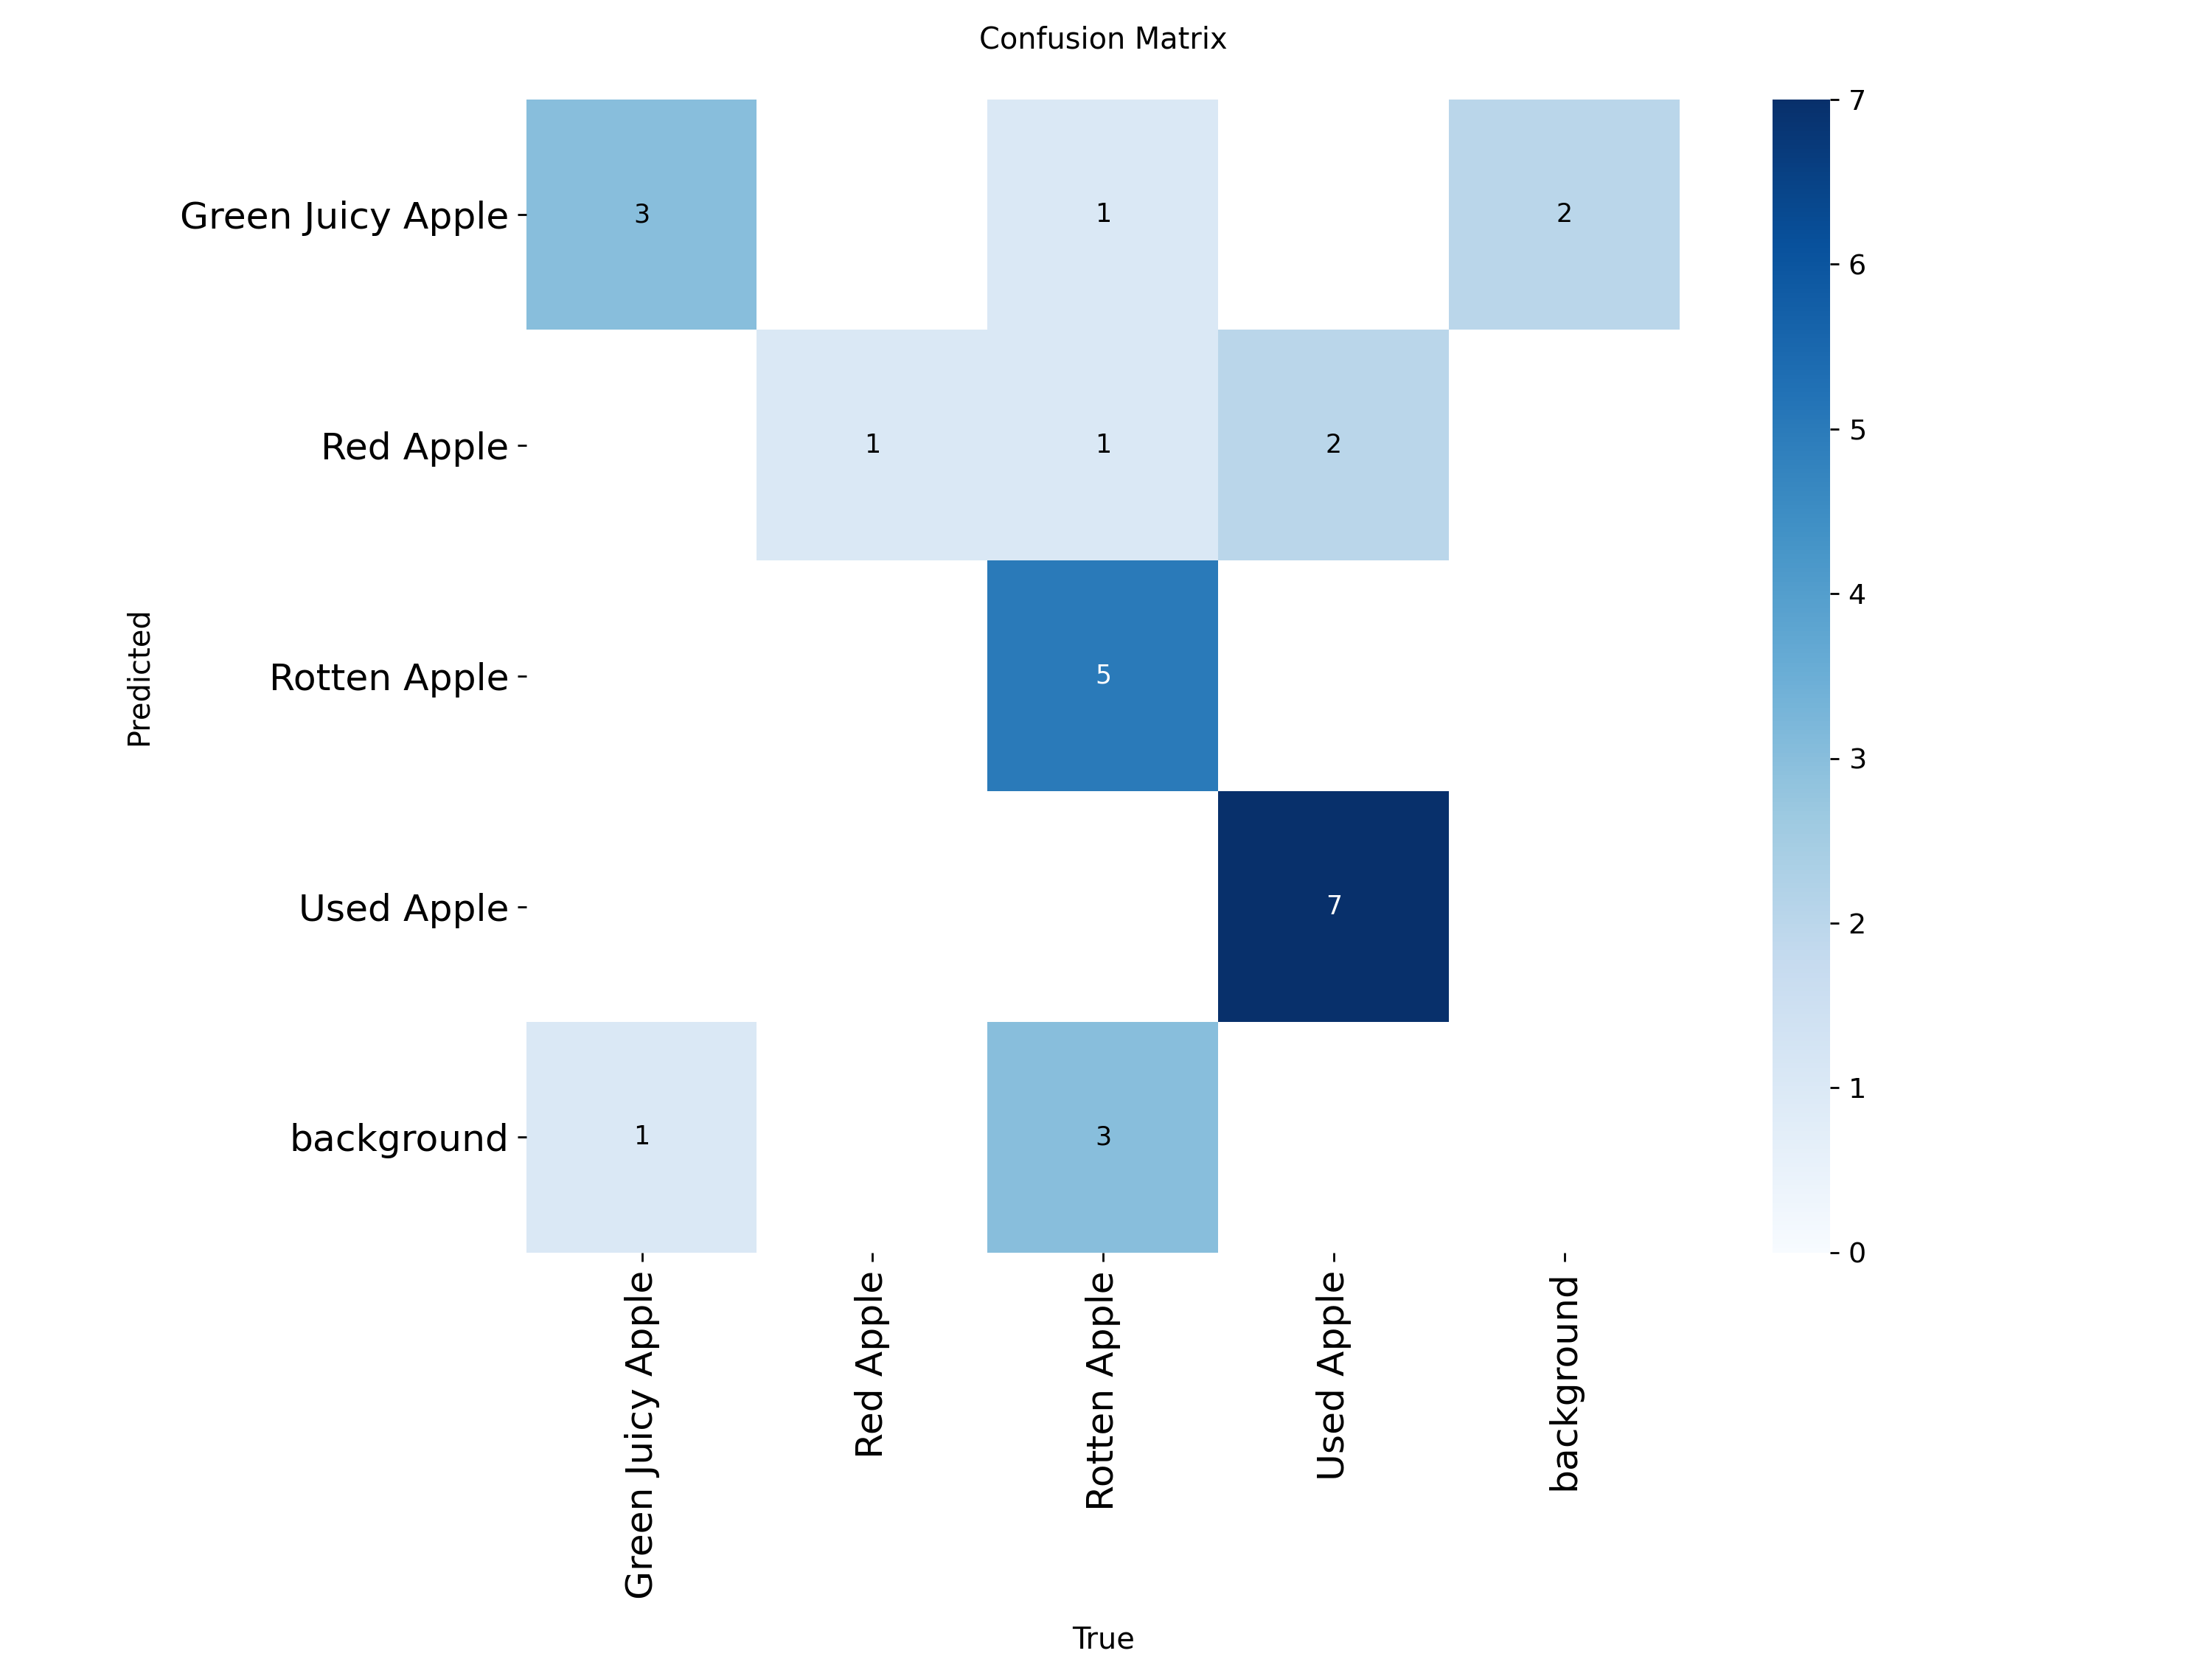

In [9]:
from IPython.display import Image, display

Image("/content/runs/detect/train/confusion_matrix.png")

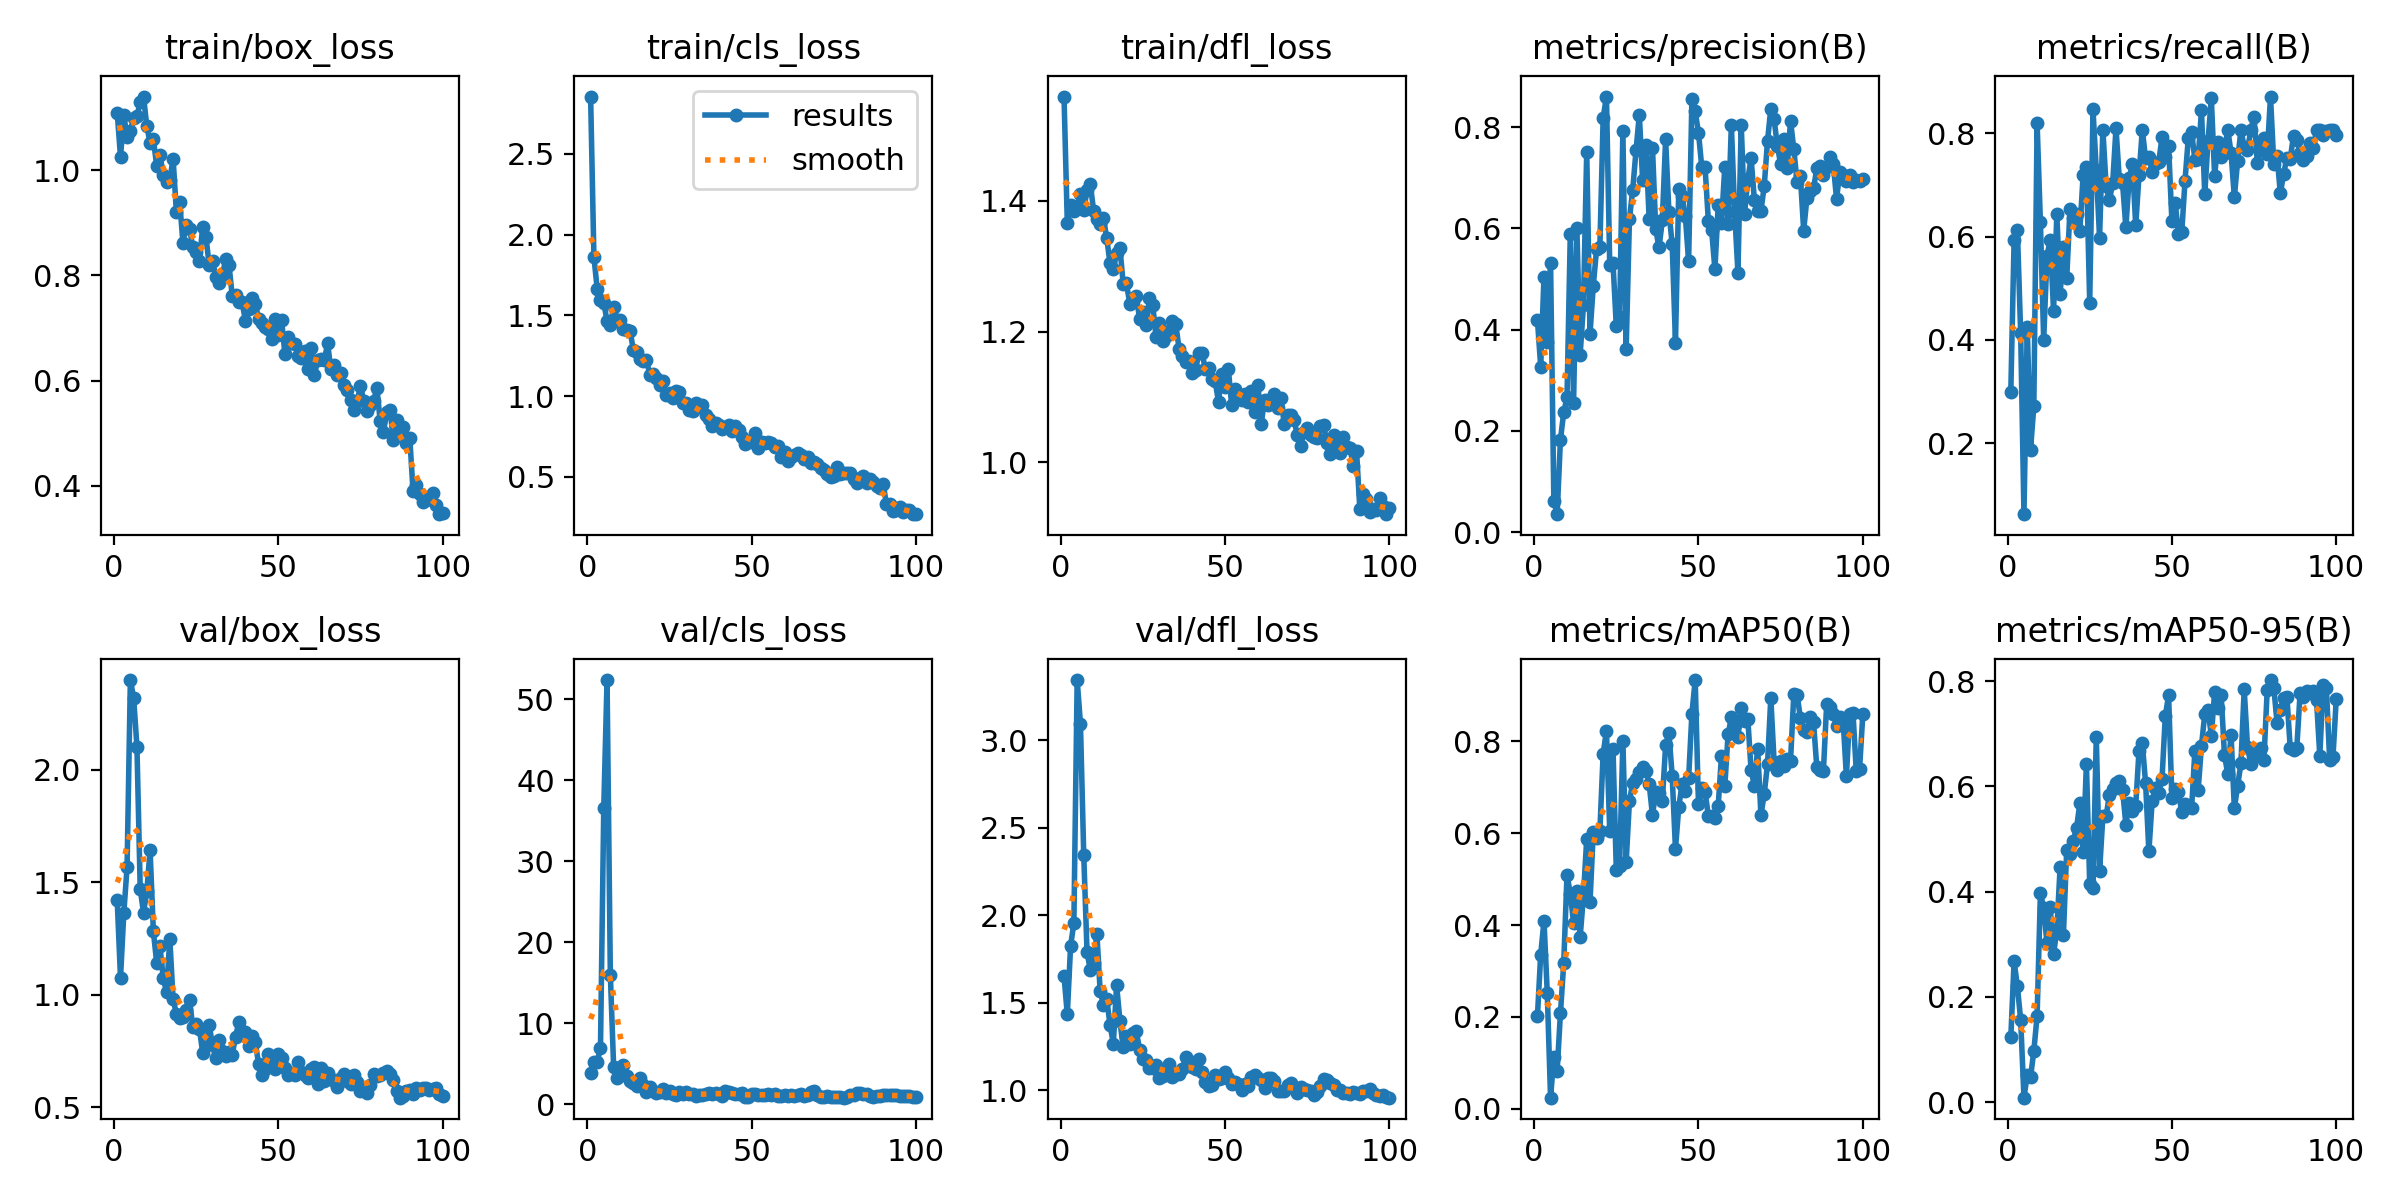

In [10]:
from IPython.display import Image, display

Image("/content/runs/detect/train/results.png")

In [14]:
!zip -r /content/runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/BoxR_curve.png (deflated 12%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 7%)
  adding: content/runs/detect/train/train_batch1351.jpg (deflated 11%)
  adding: content/runs/detect/train/train_batch1350.jpg (deflated 15%)
  adding: content/runs/detect/train/BoxPR_curve.png (deflated 17%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 27%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 24%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 10%)
  adding: content/runs/detect/train/labels.jpg (deflated 26%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 19%)
  adding: content/runs/detect/train/results.csv (deflated 61%)
  adding: content/runs/detect/train/BoxF1_curve.png (deflated 9%)
  adding: content/runs/detect/train/weights

In [15]:
!zip -r /content/Apples-6.zip /content/Apples-6

  adding: content/Apples-6/ (stored 0%)
  adding: content/Apples-6/train/ (stored 0%)
  adding: content/Apples-6/train/labels/ (stored 0%)
  adding: content/Apples-6/train/labels/Apples-9-Copy_jpeg.rf.ae496561e36d0dab46c7e694865c32cc.txt (deflated 67%)
  adding: content/Apples-6/train/labels/Apples-87_jpeg.rf.7e3a9f635980c243e20dbf7949c48518.txt (deflated 32%)
  adding: content/Apples-6/train/labels/Apples-36-Copy_jpeg.rf.d8998d04a2e6273e9317daea4f9e5399.txt (deflated 26%)
  adding: content/Apples-6/train/labels/Apples-43-Copy_jpeg.rf.47c4047658e913ffbb4319a1dd74aa94.txt (deflated 35%)
  adding: content/Apples-6/train/labels/Apples-56-Copy_jpeg.rf.b6e4a1d1287bc87c5a18163ed7b04d40.txt (deflated 46%)
  adding: content/Apples-6/train/labels/Apples-84_jpeg.rf.08f099b63cec575779d48c396425b9b3.txt (deflated 26%)
  adding: content/Apples-6/train/labels/Apples-26-Copy_jpeg.rf.82cce48f75bf8309a96bd940d0c463e3.txt (deflated 36%)
  adding: content/Apples-6/train/labels/Apples-33-Copy_jpeg.rf.d90e